In [1]:
import numpy as np 
import pandas as pd

In [2]:
dataset = pd.read_csv("twitter_hate_speech.csv")

In [3]:
dataset.isnull().sum()

Unnamed: 0    0
class         0
tweet         0
dtype: int64

In [4]:
dataset.info

<bound method DataFrame.info of        Unnamed: 0  class                                              tweet
0               0      2  !!! RT @mayasolovely: As a woman you shouldn't...
1               1      1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2               2      1  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3               3      1  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4               4      1  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...           ...    ...                                                ...
24778       24778      1  you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779       24779      2  you've gone and broke the wrong heart baby, an...
24780       24780      1  young buck wanna eat!!.. dat nigguh like I ain...
24781       24781      1              youu got wild bitches tellin you lies
24782       24782      2  ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...

[24783 rows x 3 columns]>

In [5]:
dataset.describe()

,Unnamed: 0,class
count,24783.000000,24783.000000
mean,12391.000000,1.110277
std,7154.380197,0.462089
min,0.000000,0.000000
25%,6195.500000,1.000000
50%,12391.000000,1.000000
75%,18586.500000,1.000000
max,24782.000000,2.000000


In [6]:
dataset

,Unnamed: 0,class,tweet
0,0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...
24778,24778,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,24779,2,"you've gone and broke the wrong heart baby, an..."
24780,24780,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,24781,1,youu got wild bitches tellin you lies


In [7]:
dataset["label"] = dataset["class"].map({0:"hate speech", 1:"offensive language",2:"Not either offensive or hate"})

In [8]:
dataset

,Unnamed: 0,class,tweet,label
0,0,2,!!! RT @mayasolovely: As a woman you shouldn't...,Not either offensive or hate
1,1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,offensive language
2,2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,offensive language
3,3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,offensive language
4,4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,offensive language
...,...,...,...,...
24778,24778,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,offensive language
24779,24779,2,"you've gone and broke the wrong heart baby, an...",Not either offensive or hate
24780,24780,1,young buck wanna eat!!.. dat nigguh like I ain...,offensive language
24781,24781,1,youu got wild bitches tellin you lies,offensive language


In [9]:
data = dataset [["tweet","label"]]

In [10]:
data

,tweet,label
0,!!! RT @mayasolovely: As a woman you shouldn't...,Not either offensive or hate
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,offensive language
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,offensive language
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,offensive language
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,offensive language
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,offensive language
24779,"you've gone and broke the wrong heart baby, an...",Not either offensive or hate
24780,young buck wanna eat!!.. dat nigguh like I ain...,offensive language
24781,youu got wild bitches tellin you lies,offensive language


In [11]:
import re 
import nltk 
import string

In [12]:
from nltk.corpus import stopwords
stopwords = set (stopwords.words("english"))
stopwords.add('rt')

In [13]:
stemmer = nltk.SnowballStemmer("english")

In [14]:
def clean_data(tweet):
    tweet = str(tweet).lower()
    tweet = re.sub('https?://\S+|www\.S+',"",tweet)
    tweet = re.sub('\[*?\]','',tweet)
    tweet = re.sub('[%s]'%re.escape(string.punctuation),'',tweet)
    tweet = re.sub('\n','',tweet)
    
    words = tweet.split()
    tweet = [word for word in words if word not in stopwords]
    tweet = " ".join(tweet)
    return tweet

In [15]:
data.loc[:, "tweet"] = data["tweet"].apply(clean_data)

C:\Users\user\AppData\Local\Temp\ipykernel_45200\508937760.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, "tweet"] = data["tweet"].apply(clean_data)


In [16]:
data

,tweet,label
0,mayasolovely woman shouldnt complain cleaning ...,Not either offensive or hate
1,mleew17 boy dats coldtyga dwn bad cuffin dat h...,offensive language
2,urkindofbrand dawg 80sbaby4life ever fuck bitc...,offensive language
3,cganderson vivabased look like tranny,offensive language
4,shenikaroberts shit hear might true might fake...,offensive language
...,...,...
24778,yous muthafin lie 8220lifeasking 20pearls core...,offensive language
24779,youve gone broke wrong heart baby drove rednec...,Not either offensive or hate
24780,young buck wanna eat dat nigguh like aint fuck...,offensive language
24781,youu got wild bitches tellin lies,offensive language


In [17]:
x = np.array(data["tweet"])
y = np.array(data["label"])

In [18]:
x

array(['mayasolovely woman shouldnt complain cleaning house amp man always take trash',
       'mleew17 boy dats coldtyga dwn bad cuffin dat hoe 1st place',
       'urkindofbrand dawg 80sbaby4life ever fuck bitch start cry confused shit',
       ..., 'young buck wanna eat dat nigguh like aint fuckin dis',
       'youu got wild bitches tellin lies',
       'ruffled ntac eileen dahlia beautiful color combination pink orange yellow amp white coll'],
      dtype=object)

In [19]:
y

array(['Not either offensive or hate', 'offensive language',
       'offensive language', ..., 'offensive language',
       'offensive language', 'Not either offensive or hate'], dtype=object)

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [21]:
cv = CountVectorizer()
x=cv.fit_transform(x)

In [22]:
x

<24783x38189 sparse matrix of type '<class 'numpy.int64'>'
	with 205886 stored elements in Compressed Sparse Row format>

In [23]:
 x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [24]:
x_train

<16604x38189 sparse matrix of type '<class 'numpy.int64'>'
	with 138091 stored elements in Compressed Sparse Row format>

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [27]:
y_pred = dt.predict(x_test)

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1160,   36,  183],
       [  52,  141,  272],
       [ 263,  228, 5844]], dtype=int64)

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


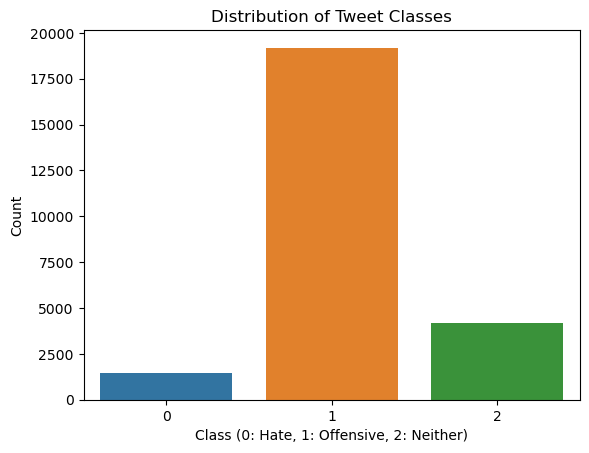

In [30]:
sns.countplot(data=dataset, x='class')
plt.title('Distribution of Tweet Classes')
plt.xlabel('Class (0: Hate, 1: Offensive, 2: Neither)')
plt.ylabel('Count')
plt.show()

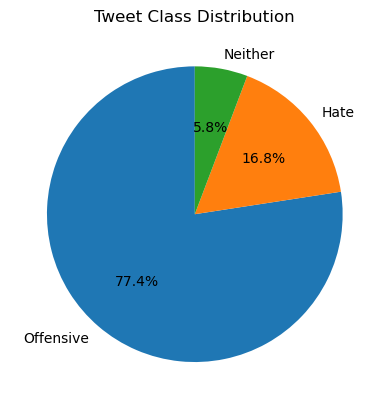

In [31]:
dataset['class'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Offensive', 'Hate', 'Neither'], startangle=90)
plt.title('Tweet Class Distribution')
plt.ylabel('')
plt.show()


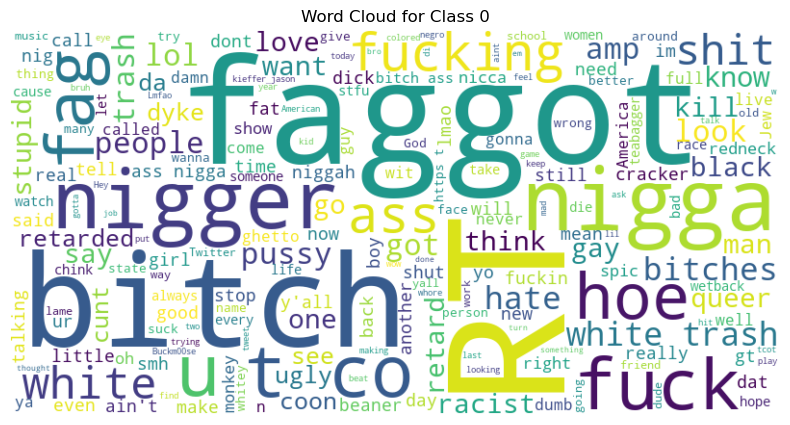

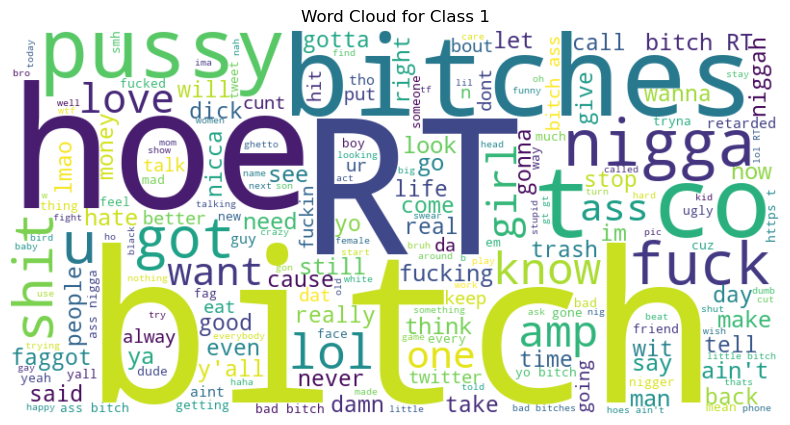

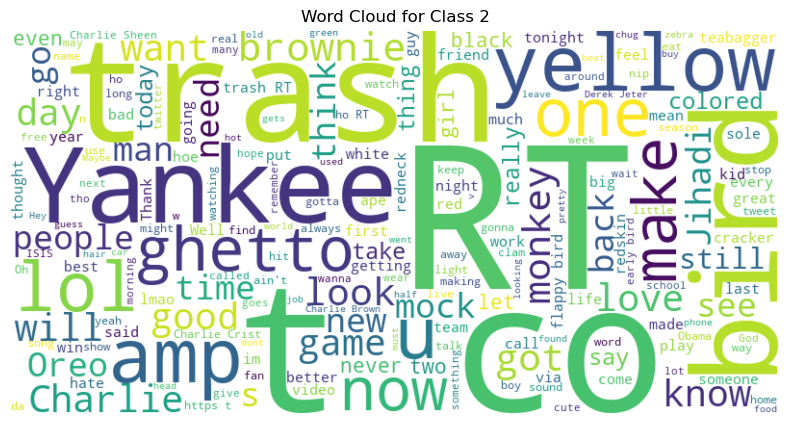

In [32]:
for label in sorted(dataset['class'].unique()):
    text = " ".join(dataset[dataset['class'] == label]['tweet'].astype(str))
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for Class {label}")
    plt.show()


<Axes: >

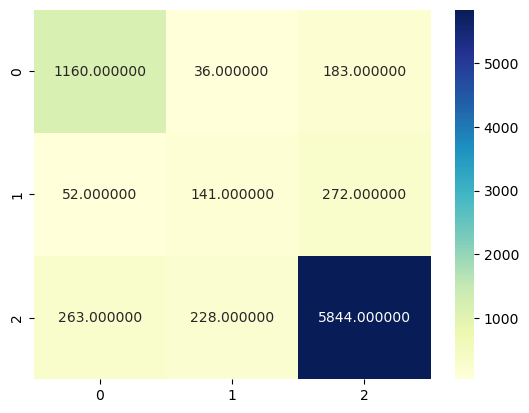

In [33]:
sns.heatmap(cm,annot=True,fmt="1f",cmap="YlGnBu")

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.87357867709989

In [35]:
sample = "franky is a black nigga  "
sample = clean_data(sample)

In [36]:
sample

'franky black nigga'

In [37]:
data1 = cv.transform([sample]).toarray()

In [38]:
data1

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [39]:
dt.predict(data1)

array(['offensive language'], dtype=object)